In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import seaborn as sns
import datetime as dat
import matplotlib as plt
import datetime as dt
import xgboost as xgb
%matplotlib inline
sns.set()

In [2]:
features_ventana1 = pd.read_csv('../xgb/features_clicks_gonzalo_ventana1.csv').set_index('ref_hash')
aux_ventana1 = pd.read_csv('../xgb/features_events_gonzalo_ventana1.csv').set_index('ref_hash')
features_ventana1.join(aux_ventana1, how = 'outer', lsuffix = '_clicks', rsuffix = '_events')
aux_ventana1 = pd.read_csv('../xgb/features_installs_gonzalo_ventana1.csv').set_index('ref_hash')
features_ventana1.join(aux_ventana1, how = 'outer', rsuffix = '_installs')
aux_ventana1 = pd.read_csv('../xgb/features_auctions_gonzalo_ventana1.csv').set_index('ref_hash')
features_ventana1.join(aux_ventana1, how = 'outer', rsuffix = '_auctions')
features_ventana2 = features_ventana1.fillna(0)

labels_st_ventana1 = pd.read_csv('../xgb/labels_st_ventana1.csv').set_index('device_id')
ventana1 = features_ventana1.join(labels_st_ventana1, how = 'left').fillna(259200)#3 dias pasado a segundos

In [3]:
pd.read_csv('../xgb/labels_st_ventana1.csv')

,device_id,tiempo_hasta_aparicion
0,100033926124811452,184250.587009
1,1000400432115255220,9663.200096
2,1001123163431776865,6107.707241
3,1001144380199556647,54775.733409
4,1001358436431521709,13147.387349
5,1001650136929210538,48.667344
6,1001893648440705480,146533.939844
7,1002004782572506858,12671.761233
8,1002085736203824817,4118.989811
9,1002447145227437936,3465.745162


In [4]:
features_ventana2 = pd.read_csv('../xgb/features_clicks_gonzalo_ventana2.csv').set_index('ref_hash')
aux_ventana2 = pd.read_csv('../xgb/features_events_gonzalo_ventana2.csv').set_index('ref_hash')
features_ventana2.join(aux_ventana2, how = 'outer', lsuffix = '_clicks', rsuffix = '_events')
aux_ventana2 = pd.read_csv('../xgb/features_installs_gonzalo_ventana2.csv').set_index('ref_hash')
features_ventana2.join(aux_ventana2, how = 'outer', rsuffix = '_installs')
aux_ventana2 = pd.read_csv('../xgb/features_auctions_gonzalo_ventana2.csv').set_index('ref_hash')
features_ventana2.join(aux_ventana2, how = 'outer', rsuffix = '_auctions')
features_ventana2 = features_ventana2.fillna(0)

labels_st_ventana2 = pd.read_csv('../xgb/labels_st_ventana2.csv').set_index('device_id')
ventana2 = features_ventana2.join(labels_st_ventana2, how = 'left').fillna(259200)#3 dias pasado a segundos

In [5]:
features_ventana3 = pd.read_csv('../xgb/features_clicks_gonzalo_ventana3.csv').set_index('ref_hash')
aux_ventana3 = pd.read_csv('../xgb/features_events_gonzalo_ventana3.csv').set_index('ref_hash')
features_ventana3.join(aux_ventana3, how = 'outer', lsuffix = '_clicks', rsuffix = '_events')
aux_ventana3 = pd.read_csv('../xgb/features_installs_gonzalo_ventana3.csv').set_index('ref_hash')
features_ventana3.join(aux_ventana3, how = 'outer', rsuffix = '_installs')
aux_ventana3 = pd.read_csv('../xgb/features_auctions_gonzalo_ventana3.csv').set_index('ref_hash')
features_ventana3.join(aux_ventana3, how = 'outer', rsuffix = '_auctions')
features_ventana3 = features_ventana3.fillna(0)

labels_st_ventana3 = pd.read_csv('../xgb/labels_st_ventana3.csv').set_index('device_id')
ventana3 = features_ventana3.join(labels_st_ventana3, how = 'left').fillna(259200)#3 dias pasado a segundos

In [6]:
features_ventana4 = pd.read_csv('../xgb/features_clicks_gonzalo_ventana4.csv').set_index('ref_hash')
aux_ventana4 = pd.read_csv('../xgb/features_events_gonzalo_ventana4.csv').set_index('ref_hash')
features_ventana4.join(aux_ventana4, how = 'outer', lsuffix = '_clicks', rsuffix = '_events')
aux_ventana4 = pd.read_csv('../xgb/features_installs_gonzalo_ventana4.csv').set_index('ref_hash')
features_ventana4.join(aux_ventana4, how = 'outer', rsuffix = '_installs')
aux_ventana4 = pd.read_csv('../xgb/features_auctions_gonzalo_ventana4.csv').set_index('ref_hash')
features_ventana4.join(aux_ventana4, how = 'outer', rsuffix = '_auctions')
features_ventana4 = features_ventana4.fillna(0)

labels_st_ventana4 = pd.read_csv('../xgb/labels_st_ventana4.csv').set_index('device_id')
ventana4 = features_ventana4.join(labels_st_ventana4, how = 'left').fillna(259200)#3 dias pasado a segundos

In [7]:
matriz = ventana1.append(ventana2).append(ventana3).append(ventana4).reset_index('ref_hash')
filas = matriz.shape[0]
matriz.head(5)

,ref_hash,latitude_sum,latitude_mean,latitude_std,latitude_min,latitude_max,longitude_sum,longitude_mean,longitude_std,longitude_min,...,time_categ1 a 3 min_mean,time_categ1 a 3 min_std,time_categ1 a 3 min_min,time_categ1 a 3 min_max,time_categ3 a 10min_sum,time_categ3 a 10min_mean,time_categ3 a 10min_std,time_categ3 a 10min_min,time_categ3 a 10min_max,tiempo_hasta_aparicion
0,1461247282174365,1.716947,1.716947,0.0,1.716947,1.716947,0.871203,0.871203,0.0,0.871203,...,0.0,0.0,0,0,1,1.0,0.0,1,1,259200.000000
1,5470466329076030,1.873294,1.873294,0.0,1.873294,1.873294,0.844857,0.844857,0.0,0.844857,...,0.0,0.0,0,0,0,0.0,0.0,0,0,17850.727626
2,5534899846690585,1.816352,1.816352,0.0,1.816352,1.816352,0.833068,0.833068,0.0,0.833068,...,0.0,0.0,0,0,0,0.0,0.0,0,0,23766.251362
3,7429113196145773,1.792518,1.792518,0.0,1.792518,1.792518,0.866689,0.866689,0.0,0.866689,...,0.0,0.0,0,0,0,0.0,0.0,0,0,13825.152641
4,8577232270715133,1.712736,1.712736,0.0,1.712736,1.712736,0.869157,0.869157,0.0,0.869157,...,0.0,0.0,0,0,0,0.0,0.0,0,0,14322.143202


In [8]:
features = matriz.iloc[:,:-1]
labels = matriz.iloc[:,-1]
data_dmatrix = xgb.DMatrix(data=features,label=labels)

/usr/local/lib/python2.7/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python2.7/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [9]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = \
    train_test_split(features, labels, test_size=0.25, random_state=123)

In [10]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', 
                colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [11]:
xg_reg.fit(train_features,train_labels)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [12]:
predicted_labels = xg_reg.predict(test_features)

In [13]:
rmse = np.sqrt(mean_squared_error(test_labels, predicted_labels))
print("RMSE: %f" % (rmse))

RMSE: 95206.159187


## Importancia de los features (cuantas veces aparecen en los árboles)

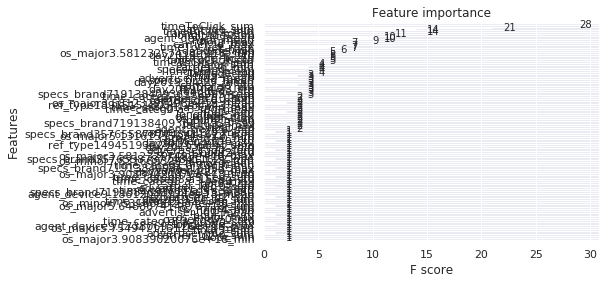

In [14]:
import matplotlib.pyplot as plt

xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [50, 60]
plt.show()

In [15]:
features_ventana7 = pd.read_csv('../xgb/features_clicks_gonzalo_ventana7.csv').set_index('ref_hash')
aux_ventana7 = pd.read_csv('../xgb/features_events_gonzalo_ventana7.csv').set_index('ref_hash')
features_ventana7.join(aux_ventana7, how = 'outer', lsuffix = '_clicks', rsuffix = '_events')
aux_ventana7 = pd.read_csv('../xgb/features_installs_gonzalo_ventana7.csv').set_index('ref_hash')
features_ventana7.join(aux_ventana7, how = 'outer', rsuffix = '_installs')
aux_ventana7 = pd.read_csv('../xgb/features_auctions_gonzalo_ventana7.csv').set_index('ref_hash')
features_ventana7.join(aux_ventana7, how = 'outer', rsuffix = '_auctions')
features_ventana7=features_ventana7.fillna(0)

labels_ventana7 = pd.read_csv('../xgb/base_target_st.csv').set_index('ref_hash')
target = labels_ventana7

ventana7 = features_ventana7.join(labels_ventana7, how = 'right').fillna(0).reset_index().rename(index=str, columns={"device_id": "ref_hash"}) #3 dias pasado a segundos
ventana7.head()

,ref_hash,latitude_sum,latitude_mean,latitude_std,latitude_min,latitude_max,longitude_sum,longitude_mean,longitude_std,longitude_min,...,time_categ1 a 3 min_mean,time_categ1 a 3 min_std,time_categ1 a 3 min_min,time_categ1 a 3 min_max,time_categ3 a 10min_sum,time_categ3 a 10min_mean,time_categ3 a 10min_std,time_categ3 a 10min_min,time_categ3 a 10min_max,obj
0,1000169251625791246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1000395625957344683,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1003027494996471685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1006670001679961544,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1007573308966476713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [16]:
features_ventana7 = ventana7.iloc[:,:-1]
labels_ventana7 = ventana7.iloc[:,-1]

In [17]:
data_dmatrix = xgb.DMatrix(data=features,label=labels)

In [18]:
predicted_target_labels = xg_reg.predict(features_ventana7)

In [19]:
target.shape

(4037, 1)

In [20]:
target['obj'] = predicted_target_labels

In [22]:
target=target.sort_values(by='obj')

In [24]:
target.to_csv('../xgb/target_st.csv')